# Red Wine Quality Prediction

-----------------------------------------------------------------------------------------------------------------------------

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
pwd

'C:\\Users\\gohil\\Desktop\\GOAL\\FINGERTIPS\\4. MACHINE LEARNING\\PROJECTS\\Python Project 6 SVM Classification - Red_Wine_Quality_Analysis'

## Load the data

In [3]:
df = pd.read_csv("Red_Wine_Quality_Analysis.csv")
df

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
0,0,0.30,0.34,1.6,0.049,14,132,0.994,0.49,9.5
1,0,0.23,0.32,8.5,0.058,47,186,0.996,0.40,9.9
2,0,0.28,0.40,6.9,0.050,30,97,0.995,0.44,10.1
3,0,0.32,0.16,7.0,0.045,30,136,0.995,0.47,9.6
4,0,0.27,0.36,20.7,0.045,45,170,1.001,0.45,8.8
...,...,...,...,...,...,...,...,...,...,...
4889,0,0.21,0.29,1.6,0.039,24,92,0.991,0.50,11.2
4890,0,0.32,0.36,8.0,0.047,57,168,0.995,0.46,9.6
4891,0,0.24,0.19,1.2,0.041,30,111,0.993,0.46,9.4
4892,1,0.29,0.30,1.1,0.022,20,110,0.989,0.38,12.8


In [4]:
df.shape

(4894, 10)

In [5]:
df.describe()

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
count,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000
mean,0.216387,0.278335,0.334146,6.391582,0.045773,35.311606,138.368615,0.994048,0.489904,10.514610
std,0.411823,0.100801,0.121047,5.071695,0.021855,17.019553,42.498278,0.003007,0.114153,1.230665
min,0.000000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987000,0.220000,8.000000
25%,0.000000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.992000,0.410000,9.500000
50%,0.000000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.994000,0.470000,10.400000
75%,0.000000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996000,0.550000,11.400000
max,1.000000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.039000,1.080000,14.200000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Quality_Category    4894 non-null   int64  
 1   volatileacidity     4894 non-null   float64
 2   citricacid          4894 non-null   float64
 3   residualsugar       4894 non-null   float64
 4   chlorides           4894 non-null   float64
 5   freesulfurdioxide   4894 non-null   int64  
 6   totalsulfurdioxide  4894 non-null   int64  
 7   density             4894 non-null   float64
 8   sulphates           4894 non-null   float64
 9   alcohol             4894 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 382.5 KB


In [7]:
# Find the null values
df.isnull().sum()

Quality_Category      0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
sulphates             0
alcohol               0
dtype: int64

In [8]:
# Columns in the dataset
df.columns

Index(['Quality_Category', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')

In [9]:
df["Quality_Category"].value_counts()

0    3835
1    1059
Name: Quality_Category, dtype: int64

In [10]:
df.rename({'volatileacidity': 'volatile_acidity',
           'citricacid': 'citric_acid', 
           'residualsugar': 'residual_sugar', 
           'freesulfurdioxide': 'free_sulfur_dioxide', 
           'totalsulfurdioxide': 'total_sulfur_dioxide'}, inplace=True, axis=1)

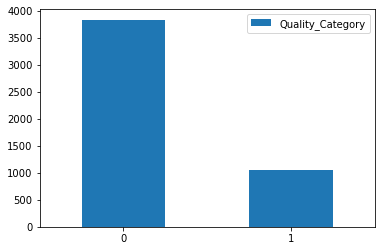

In [11]:
# The barchart of Quality_Category value counts
df["Quality_Category"].value_counts().plot(kind='bar');
plt.xticks(rotation=0)
plt.legend()

Text(0.5, 1.0, 'Volatile_Acidity vs. Citric Acid')

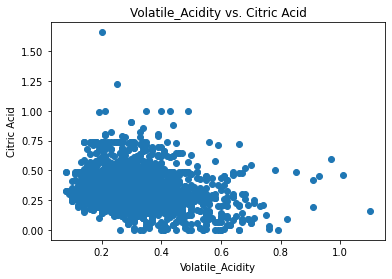

In [12]:
# Display scatter plot between volatile_acidity & citric_acid
plt.scatter(df.volatile_acidity, df.citric_acid);
plt.xlabel("Volatile_Acidity")
plt.ylabel("Citric Acid")
plt.title("Volatile_Acidity vs. Citric Acid")

Text(0.5, 1.0, 'Residual Sugar vs. Chlorides')

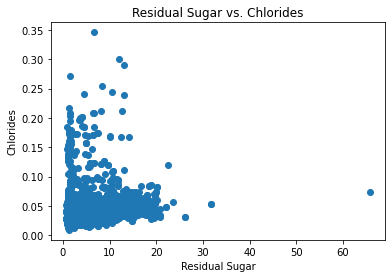

In [13]:
# Display scatter plot between residual_suger & chlorides
plt.scatter(df.residual_sugar, df.chlorides);
plt.xlabel("Residual Sugar")
plt.ylabel("Chlorides")
plt.title("Residual Sugar vs. Chlorides")

Text(0.5, 1.0, 'Sulphates vs. Alcohol')

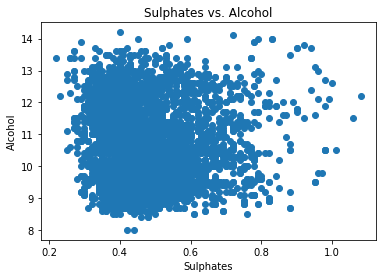

In [14]:
# Display scatter plot between sulphates & alcohol
plt.scatter(df.sulphates, df.alcohol);
plt.xlabel("Sulphates")
plt.ylabel("Alcohol")
plt.title("Sulphates vs. Alcohol")

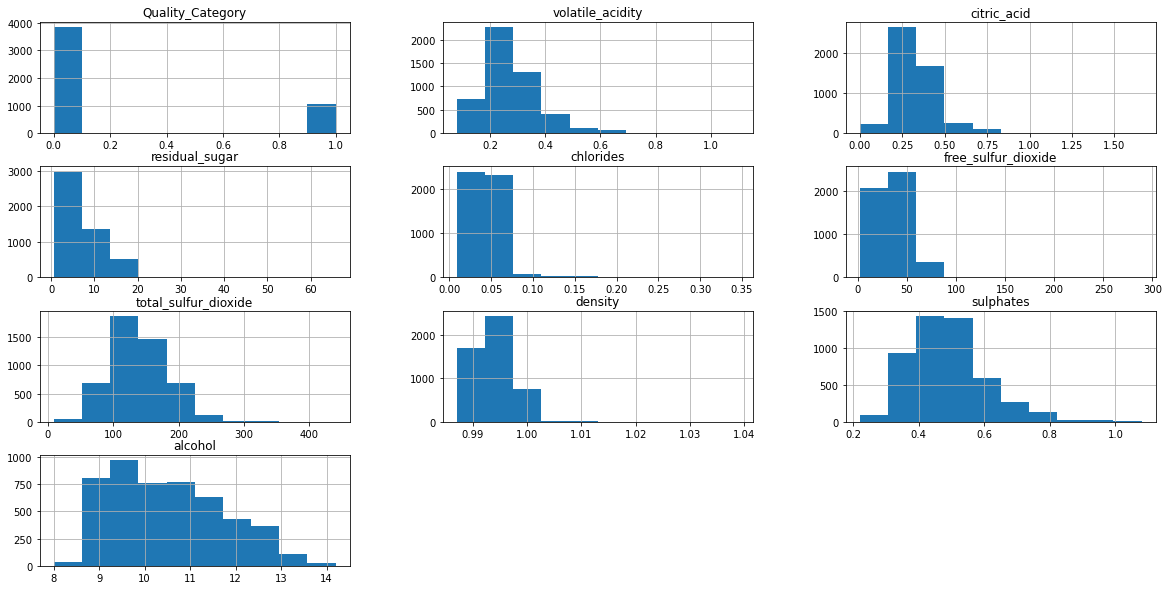

In [15]:
df.hist(figsize=(20,10));

In [16]:
# Make a correlation matrix
df.corr()

,Quality_Category,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol
Quality_Category,1.000000,-0.068957,-0.035752,-0.116420,-0.182843,-0.023122,-0.161641,-0.280778,0.047611,0.384550
volatile_acidity,-0.068957,1.000000,-0.151219,0.064970,0.071244,-0.096971,0.090255,0.026502,-0.035215,0.066148
citric_acid,-0.035752,-0.151219,1.000000,0.094453,0.114579,0.094179,0.121674,0.153802,0.062614,-0.076202
residual_sugar,-0.116420,0.064970,0.094453,1.000000,0.088498,0.298840,0.401097,0.834798,-0.026678,-0.449915
chlorides,-0.182843,0.071244,0.114579,0.088498,1.000000,0.101402,0.198737,0.255033,0.016735,-0.360112
free_sulfur_dioxide,-0.023122,-0.096971,0.094179,0.298840,0.101402,1.000000,0.615707,0.294183,0.059374,-0.249988
total_sulfur_dioxide,-0.161641,0.090255,0.121674,0.401097,0.198737,0.615707,1.000000,0.530855,0.134523,-0.448597
density,-0.280778,0.026502,0.153802,0.834798,0.255033,0.294183,0.530855,1.000000,0.071343,-0.775374
sulphates,0.047611,-0.035215,0.062614,-0.026678,0.016735,0.059374,0.134523,0.071343,1.000000,-0.017295
alcohol,0.384550,0.066148,-0.076202,-0.449915,-0.360112,-0.249988,-0.448597,-0.775374,-0.017295,1.000000


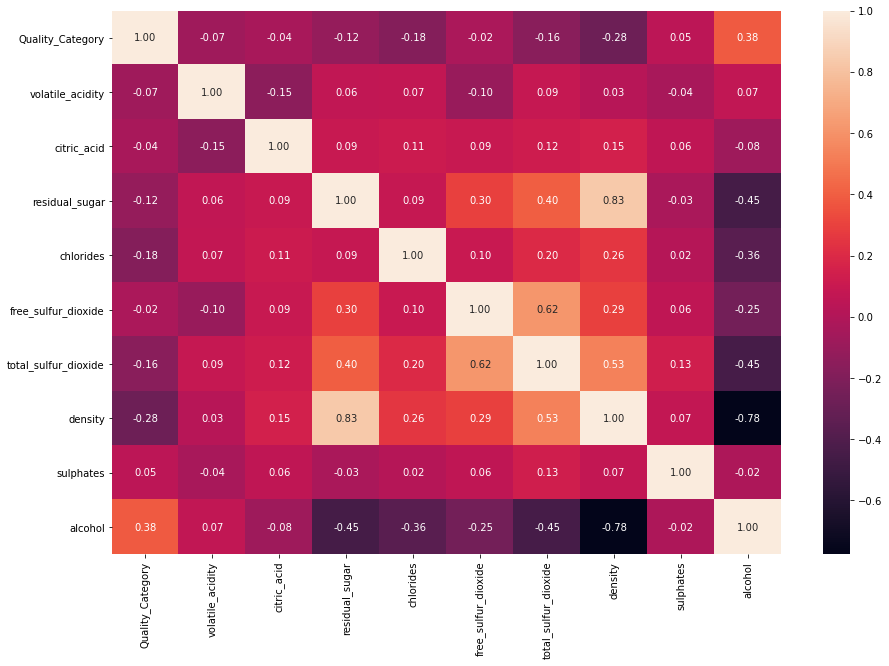

In [17]:
# Let's make our correlation matrix a little prettier

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f")

In [18]:
df.head()

,Quality_Category,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol
0,0,0.30,0.34,1.6,0.049,14,132,0.994,0.49,9.5
1,0,0.23,0.32,8.5,0.058,47,186,0.996,0.40,9.9
2,0,0.28,0.40,6.9,0.050,30,97,0.995,0.44,10.1
3,0,0.32,0.16,7.0,0.045,30,136,0.995,0.47,9.6
4,0,0.27,0.36,20.7,0.045,45,170,1.001,0.45,8.8


In [19]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()
df[["residual_sugar","free_sulfur_dioxide","total_sulfur_dioxide","alcohol"]] = standardscaler.fit_transform(df[["residual_sugar","free_sulfur_dioxide","total_sulfur_dioxide","alcohol"]])

### Create features and target data

In [20]:
X = df.drop("Quality_Category", axis=1)
Y = df.Quality_Category

In [21]:
X.head()

,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,sulphates,alcohol
0,0.30,0.34,-0.944866,0.049,-1.252312,-0.149871,0.994,0.49,-0.824525
1,0.23,0.32,0.415765,0.058,0.686833,1.120898,0.996,0.40,-0.499464
2,0.28,0.40,0.100257,0.050,-0.312120,-0.973518,0.995,0.44,-0.336933
3,0.32,0.16,0.119976,0.045,-0.312120,-0.055740,0.995,0.47,-0.743259
4,0.27,0.36,2.821519,0.045,0.569309,0.744374,1.001,0.45,-1.393381


In [22]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Quality_Category, dtype: int64

### Split Training and Testing data sets

In [23]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

### Fit the SVM model with default parameters

In [24]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train,Y_train)

SVC()

### Training ans testing accuracy

In [25]:
print("Training Accuracy:", clf.score(X_train,Y_train))
print("Testing Accuracy:", clf.score(X_test, Y_test))

Training Accuracy: 0.8132822477650063
Testing Accuracy: 0.8161389172625128


In [26]:
#Let's predict out X_test data
Y_pred_clf = clf.predict(X_test)

In [27]:
# Comparison between Predicted values and Actual values
comparison = pd.DataFrame(list(zip(Y_test, Y_pred_clf)),
               columns =['Actual', 'Predicted'])
comparison[:10]

,Actual,Predicted
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,0
8,0,0
9,1,0


In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred_clf)

0.8161389172625128

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
# A function to display precision score, recall score, accuracy, classification report, confusion matrix, F1 Score.

def evaluate_preds(Y_test, Y_pred_clf):
    """
    Performs evaluation comparison on y_true labels vs. y_preds labels on a classification.
    """
    accuracy = accuracy_score(Y_test, Y_pred_clf)
    precision = precision_score(Y_test, Y_pred_clf)
    recall = recall_score(Y_test, Y_pred_clf)
    f1 = f1_score(Y_test, Y_pred_clf)
    conf_matrix = confusion_matrix(Y_test, Y_pred_clf)
    class_report = classification_report(Y_test, Y_pred_clf)
    metrics_dict = {"accuracy:": round(accuracy, 2),
                    "precision:": round(precision, 2),
                    "recall:": round(recall, 2),
                    "f1:": round(f1, 2),}
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    print("\n")
    print(f"Confusion matrix:\n{conf_matrix}");
    print("\n")
    print(f"Classification Report:\n{class_report}");
    
    return metrics_dict

In [31]:
evaluate_preds(Y_test, Y_pred_clf)

Accuracy: 81.61%
precision: 0.72
Recall: 0.24
F1 score: 0.36


Confusion matrix:
[[748  20]
 [160  51]]


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       768
           1       0.72      0.24      0.36       211

    accuracy                           0.82       979
   macro avg       0.77      0.61      0.63       979
weighted avg       0.80      0.82      0.78       979



{'accuracy:': 0.82, 'precision:': 0.72, 'recall:': 0.24, 'f1:': 0.36}

### Fit the SVM model with different hyperparameter

In [32]:
from sklearn.svm import SVC

clf_1 = SVC(C=100)
clf_1.fit(X_train,Y_train)

SVC(C=100)

In [33]:
print("Training Accuracy:", clf_1.score(X_train,Y_train))
print("Testing Accuracy:", clf_1.score(X_test, Y_test))

Training Accuracy: 0.8406130268199233
Testing Accuracy: 0.81511746680286


In [34]:
#Let's predict out X_test data
Y_pred_clf_1 = clf.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred_clf_1)

0.8161389172625128

### Trying RandomForest

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000)

In [37]:
print("Training Accuracy:", rf.score(X_train,Y_train))
print("Testing Accuracy:", rf.score(X_test, Y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.8631256384065373


In [38]:
#Let's predict out X_test data
Y_pred_rf = rf.predict(X_test)

In [39]:
# Comparison between Predicted values and Actual values
comparison = pd.DataFrame(list(zip(Y_test, Y_pred_rf)),
               columns =['Actual', 'Predicted'])
comparison[:10]

,Actual,Predicted
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,1,1


In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred_rf)

0.8631256384065373

In [41]:
# A function to display precision score, recall score, accuracy, classification report, confusion matrix, F1 Score.

def evaluate_preds(Y_test, Y_pred_rf):
    """
    Performs evaluation comparison on y_true labels vs. y_preds labels on a classification.
    """
    accuracy = accuracy_score(Y_test, Y_pred_rf)
    precision = precision_score(Y_test, Y_pred_rf)
    recall = recall_score(Y_test, Y_pred_rf)
    f1 = f1_score(Y_test, Y_pred_rf)
    conf_matrix = confusion_matrix(Y_test, Y_pred_rf)
    class_report = classification_report(Y_test, Y_pred_rf)
    metrics_dict = {"accuracy:": round(accuracy, 2),
                    "precision:": round(precision, 2),
                    "recall:": round(recall, 2),
                    "f1:": round(f1, 2),}
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    print("\n")
    print(f"Confusion matrix:\n{conf_matrix}");
    print("\n")
    print(f"Classification Report:\n{class_report}");
    
    return metrics_dict

In [42]:
evaluate_preds(Y_test, Y_pred_rf)

Accuracy: 86.31%
precision: 0.79
Recall: 0.50
F1 score: 0.61


Confusion matrix:
[[739  29]
 [105 106]]


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       768
           1       0.79      0.50      0.61       211

    accuracy                           0.86       979
   macro avg       0.83      0.73      0.76       979
weighted avg       0.86      0.86      0.85       979



{'accuracy:': 0.86, 'precision:': 0.79, 'recall:': 0.5, 'f1:': 0.61}